```python
# '''
# Date - 17th - 25th July 2017
# Title - New York's Citi Bikes Dataset
# Description - Data Science Portfolio Project #1
# Objectives - EDA & Prediction of Gender of the riders
# Author - Nikhil Akki
# Website - http://nikhilakki.in
# Blog - http://datainfogeek.com/author/nikhil
# LinkedIn - http://LinkedIn.com/in/nikhilakki
# GitHub - http://GitHub.com/nikhilakki
# License - MIT
# '''
```

In [209]:
# Load Data in a Pandas Dataframe
import pandas as pd
import seaborn as sns #just to make our visualization prettier ;-) 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import math
%matplotlib inline

## Run this first

In [84]:
df = pd.read_csv('/Users/dgeek/Documents/fsdse/NY-Citibike/2015-2017-combined.csv')

### Frames is a list object which will be appended with each
### dataframe (2015-2017-1 to 2015-2017-19) with the help of the for loop
```python
frames = []
for i in range(0,19):
    temp_df = pd.read_csv('/Users/dgeek/Documents/fsdse/NY-Citibike/2015-2017-'+str(i+1)+'.csv')
    frames.append(temp_df)
# df is the master dataframe with all 19 csvs merged into one
# pd.concat creates a dataframe with the frames list object
df = pd.concat(frames)
```

In [85]:
# checks for first 5 values of dataframe - df
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


In [86]:
# checks for length of dataframe - df
print(len(df))
ndf = df[['Trip_Duration_in_min', 'Start Time', 'Stop Time',
       'Start Station Name', 'End Station Name',
      'Bike ID', 'User Type','Birth Year', 'Gender']]
ndf.loc[:,('Birth Year')] = ndf['Birth Year'].astype(int)
ndf.head()

735502


/Users/dgeek/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Trip_Duration_in_min,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender
0,6,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960,1
1,12,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960,1
2,45,2015-10-01 00:32:46,2015-10-01 01:18:01,Lincoln Park,Lincoln Park,24628,Subscriber,1983,1
3,5,2015-10-01 00:34:31,2015-10-01 00:39:06,Newport Pkwy,Warren St,24613,Subscriber,1975,1
4,9,2015-10-01 00:40:12,2015-10-01 00:49:33,Exchange Place,Liberty Light Rail,24668,Customer,1984,0


### Exploratory Data Analysis

#### df.describe function gives the quartiles of all numeric variables

In [87]:
ndf.describe()

,Trip_Duration_in_min,Bike ID,Birth Year,Gender
count,735502.000000,735502.000000,735502.000000,735502.000000
mean,15.570669,24914.009133,1979.544239,1.123668
std,677.312437,753.768581,9.371192,0.519694
min,1.000000,14552.000000,1900.000000,0.000000
25%,4.000000,24486.000000,1975.000000,1.000000
50%,6.000000,24602.000000,1982.000000,1.000000
75%,11.000000,24711.000000,1986.000000,1.000000
max,337670.000000,29296.000000,2000.000000,2.000000


#### df.info function will show all columns attributes, count, null values (if any), dtypes - int64, object etc.


In [88]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 9 columns):
Trip_Duration_in_min    735502 non-null int64
Start Time              735502 non-null object
Stop Time               735502 non-null object
Start Station Name      735502 non-null object
End Station Name        735502 non-null object
Bike ID                 735502 non-null int64
User Type               735502 non-null object
Birth Year              735502 non-null int64
Gender                  735502 non-null int64
dtypes: int64(4), object(5)
memory usage: 50.5+ MB


In [89]:
ndf.columns
cat_cols = ['Start Station Name', 'End Station Name', 'Bike ID', 'User Type', 'Gender']
for col in cat_cols:
    ndf[col] = ndf[col].astype('category')
ndf.info()

/Users/dgeek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 9 columns):
Trip_Duration_in_min    735502 non-null int64
Start Time              735502 non-null object
Stop Time               735502 non-null object
Start Station Name      735502 non-null category
End Station Name        735502 non-null category
Bike ID                 735502 non-null category
User Type               735502 non-null category
Birth Year              735502 non-null int64
Gender                  735502 non-null category
dtypes: category(5), int64(2), object(2)
memory usage: 26.7+ MB


In [90]:
df['User Type'].value_counts()

Subscriber    688140
Customer       47362
Name: User Type, dtype: int64

In [93]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 9 columns):
Trip_Duration_in_min    735502 non-null int64
Start Time              735502 non-null object
Stop Time               735502 non-null object
Start Station Name      735502 non-null category
End Station Name        735502 non-null category
Bike ID                 735502 non-null category
User Type               735502 non-null category
Birth Year              735502 non-null int64
Gender                  735502 non-null category
dtypes: category(5), int64(2), object(2)
memory usage: 26.7+ MB


### Missing values treated with Mode, lets now bring all the feature variables to the right scale


#### Since User Type is a categorical data field we will find the mode

In [92]:
UT_mode = ndf.mode().loc[:('User Type')]
# imputing mode inplace of missing values
ndf['User Type'].fillna(value=UT_mode['User Type'][0], inplace=True)
# check the counts again
ndf['User Type'].value_counts()

/Users/dgeek/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Subscriber    688140
Customer       47362
Name: User Type, dtype: int64

#### In the above chart we see that columns - Usertype & Birth Year have some missing values this can be treated in a few ways, first lets explore our options


#### Birth Year missing values

In [94]:
BY_mode = ndf.mode().loc[:('Birth Year')]
ndf['Birth Year'].fillna(value=BY_mode['Birth Year'][0], inplace=True)
ndf.info()

/Users/dgeek/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 9 columns):
Trip_Duration_in_min    735502 non-null int64
Start Time              735502 non-null object
Stop Time               735502 non-null object
Start Station Name      735502 non-null category
End Station Name        735502 non-null category
Bike ID                 735502 non-null category
User Type               735502 non-null category
Birth Year              735502 non-null int64
Gender                  735502 non-null category
dtypes: category(5), int64(2), object(2)
memory usage: 26.7+ MB


### Converting Trip Duration in seconds to minutes

In [204]:
df['Trip_Duration_in_min'] = df['Trip Duration']/60
# rounding to nearest decimal and converting to int32 for easier computation
df['Trip_Duration_in_min'] = df['Trip_Duration_in_min'].round().astype('int32')

#### Average Trip Duration - 16 Minutes

In [96]:
ndf['Trip_Duration_in_min'].mean().round().astype(int)

16

#### Top 10 Duration in minutes number of rides

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 9 columns):
Trip_Duration_in_min    735502 non-null int64
Start Time              735502 non-null object
Stop Time               735502 non-null object
Start Station Name      735502 non-null category
End Station Name        735502 non-null category
Bike ID                 735502 non-null category
User Type               735502 non-null category
Birth Year              735502 non-null int64
Gender                  735502 non-null category
dtypes: category(5), int64(2), object(2)
memory usage: 26.7+ MB


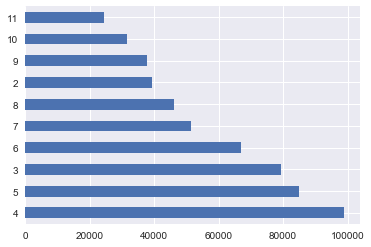

In [97]:
ndf['Trip_Duration_in_min'].value_counts().head(10).plot.barh()
ndf.info()

### creating a combined copy of dfs 2015-2017 for future use
```python
df.to_csv('/Users/dgeek/Documents/fsdse/NY-Citibike/2015-2017-combined.csv')
```

#### Lets plot to get a visual


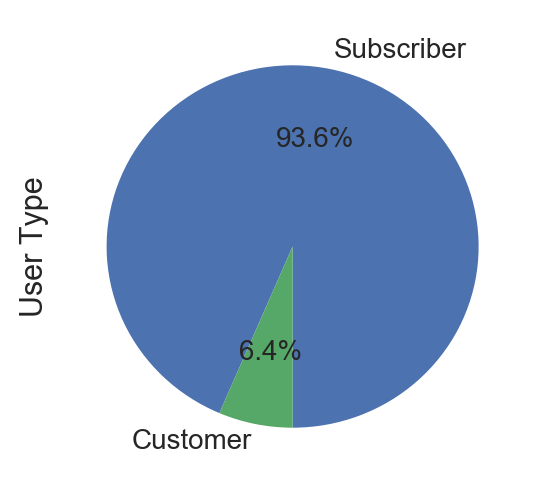

In [203]:
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
df['User Type'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10)


### Attempt to Calculate distance between Start & End stops (doesn't work)

So now we try to find the distance (in kms or miles) so that we can determine the average speed of each ride.
First approach was to calculate distance from lat long (refer - http://andrew.hedges.name/experiments/haversine/)
Andrew has found a neat way to find the distance just with lat long
Although in our case it would be useful, let me explain so the distance is calculated by this formula -
Formula - 
```
dlon = lon2 - lon1
dlat = lat2 - lat1
a = (sin(dlat/2))^2 + cos(lat1) * cos(lat2) * (sin(dlon/2))^2
c = 2 * atan2( sqrt(a), sqrt(1-a) )
d = R * c (where R is the radius of the Earth)
```
The complicated formula along with radius of the earth helps in calculating the distance.
However, it doesn't or rather cannot account for the road or route the person has taken.
This method is useful for calculating Airborne travel since the path is pretty much straight forward.
This formula is been used by NASA and other agencies with intelligent people. Long story short this approach we won't be taking.

In [99]:
lat1 = df['Start Station Latitude'][:1]
lon1 = df['Start Station Latitude'][:1]
lat2 = df['End Station Latitude'][:1]
lon2 = df['End Station Latitude'][:1]
time = df['Trip_Duration_in_min'][:1]
R = 6371
dlon = lon2 - lon1
dlat = lat2 - lat1
a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2
c = 2 * math.atan2( np.sqrt(a), np.sqrt(1-a) )
d = R * c #(where R is the radius of the Earth)

print('%d'%d+' kms distance was covered in %d' %time+' minutes')

25 kms distance was covered in 6 minutes


#### This clearly doesn't work for us, so we will have to look for another way. May be [Google Maps Distance Matrix API would help](https://developers.google.com/maps/documentation/distance-matrix/intro),  I'm working to on it and if it works I'll post it in my next blog post. If you have got it working for you please feel free to share or tag me or this article.

## Further Analysis

In [100]:
print(len(ndf['Start Station Name'].unique()))

51


In [101]:
print(len(ndf['End Station Name'].unique()))

114


In [102]:
stations = ndf[['Start Station Name', 'End Station Name']]

In [103]:
114*51*len(df['Start Station ID'])

4276208628

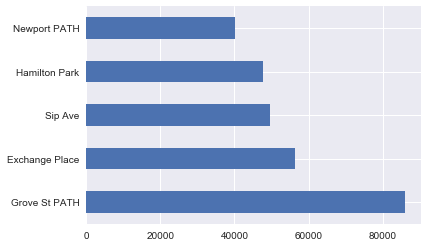

In [207]:
ndf['Start Station Name'].value_counts().head().plot.barh()

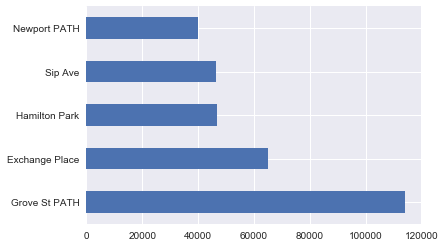

In [208]:
ndf['End Station Name'].value_counts().head().plot.barh()

In [107]:
ndf['Start Date'] = pd.to_datetime(ndf['Start Time'])
ndf['Stop Date'] = pd.to_datetime(ndf['Stop Time'])

/Users/dgeek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dgeek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
ndf.head()

,Trip_Duration_in_min,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Start Date,Stop Date
0,6,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960,1,2015-10-01 00:16:26,2015-10-01 00:22:42
1,12,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960,1,2015-10-01 00:27:12,2015-10-01 00:39:32
2,45,2015-10-01 00:32:46,2015-10-01 01:18:01,Lincoln Park,Lincoln Park,24628,Subscriber,1983,1,2015-10-01 00:32:46,2015-10-01 01:18:01
3,5,2015-10-01 00:34:31,2015-10-01 00:39:06,Newport Pkwy,Warren St,24613,Subscriber,1975,1,2015-10-01 00:34:31,2015-10-01 00:39:06
4,9,2015-10-01 00:40:12,2015-10-01 00:49:33,Exchange Place,Liberty Light Rail,24668,Customer,1984,0,2015-10-01 00:40:12,2015-10-01 00:49:33


In [109]:
ndf['Start Month'] = ndf['Start Date'].dt.month
ndf['Start Day'] = ndf['Start Date'].dt.day
ndf['Start Minute'] = ndf['Start Date'].dt.minute
ndf['Start Week'] = ndf['Start Date'].dt.minute
ndf['Start Weekday'] = ndf['Start Date'].dt.minute
ndf['Start Week'] = ndf['Start Date'].dt.week
ndf['Start Weekofyear'] = ndf['Start Date'].dt.weekofyear
ndf['Start weekday'] = ndf['Start Date'].dt.weekday
ndf['Start dayofyear'] = ndf['Start Date'].dt.dayofyear
ndf['Start weekday_name'] = ndf['Start Date'].dt.weekday_name
ndf['Start quarter'] = ndf['Start Date'].dt.quarter

/Users/dgeek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dgeek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dgeek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [110]:
ndf['Stop Month'] = ndf['Stop Date'].dt.month
ndf['Stop Day'] = ndf['Start Date'].dt.day
ndf['Stop Minute'] = ndf['Stop Date'].dt.minute
ndf['Stop Week'] = ndf['Stop Date'].dt.minute
ndf['Stop Weekday'] = ndf['Stop Date'].dt.minute
ndf['Stop Week'] = ndf['Stop Date'].dt.week
ndf['Stop Weekofyear'] = ndf['Stop Date'].dt.weekofyear
ndf['Stop weekday'] = ndf['Stop Date'].dt.weekday
ndf['Stop dayofyear'] = ndf['Stop Date'].dt.dayofyear
ndf['Stop weekday_name'] = ndf['Stop Date'].dt.weekday_name
ndf['Stop quarter'] = ndf['Stop Date'].dt.quarter

In [111]:
ndf.head()

,Trip_Duration_in_min,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Start Date,...,Stop Month,Stop Day,Stop Minute,Stop Week,Stop Weekday,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop weekday_name,Stop quarter
0,6,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960,1,2015-10-01 00:16:26,...,10,1,22,40,22,40,3,274,Thursday,4
1,12,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960,1,2015-10-01 00:27:12,...,10,1,39,40,39,40,3,274,Thursday,4
2,45,2015-10-01 00:32:46,2015-10-01 01:18:01,Lincoln Park,Lincoln Park,24628,Subscriber,1983,1,2015-10-01 00:32:46,...,10,1,18,40,18,40,3,274,Thursday,4
3,5,2015-10-01 00:34:31,2015-10-01 00:39:06,Newport Pkwy,Warren St,24613,Subscriber,1975,1,2015-10-01 00:34:31,...,10,1,39,40,39,40,3,274,Thursday,4
4,9,2015-10-01 00:40:12,2015-10-01 00:49:33,Exchange Place,Liberty Light Rail,24668,Customer,1984,0,2015-10-01 00:40:12,...,10,1,49,40,49,40,3,274,Thursday,4


In [112]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 31 columns):
Trip_Duration_in_min    735502 non-null int64
Start Time              735502 non-null object
Stop Time               735502 non-null object
Start Station Name      735502 non-null category
End Station Name        735502 non-null category
Bike ID                 735502 non-null category
User Type               735502 non-null category
Birth Year              735502 non-null int64
Gender                  735502 non-null category
Start Date              735502 non-null datetime64[ns]
Stop Date               735502 non-null datetime64[ns]
Start Month             735502 non-null int64
Start Day               735502 non-null int64
Start Minute            735502 non-null int64
Start Week              735502 non-null int64
Start Weekday           735502 non-null int64
Start Weekofyear        735502 non-null int64
Start weekday           735502 non-null int64
Start dayofyear         73

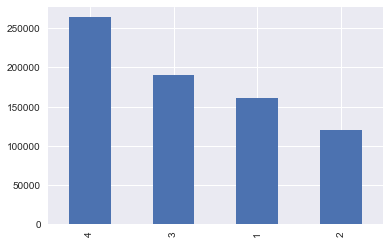

In [113]:
ndf['Start quarter'].value_counts().head().plot.bar()

### 4th Quarter seems to have more riders

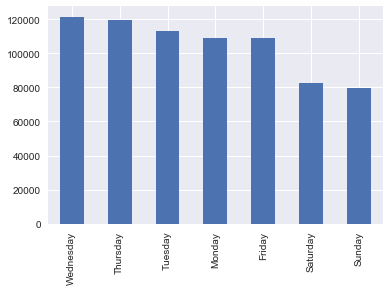

In [114]:
ndf['Start weekday_name'].value_counts().plot.bar()

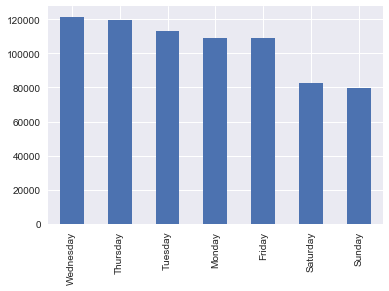

In [115]:
ndf['Stop weekday_name'].value_counts().plot.bar()

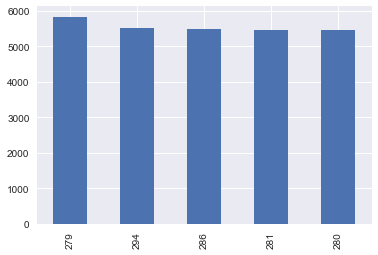

In [116]:
ndf['Stop dayofyear'].value_counts().head().plot.bar()

In [117]:

cols = ndf.columns
data = ndf[['Trip_Duration_in_min', 'Start Station Name',
       'End Station Name', 'User Type', 'Birth Year', 
      'Start Month', 'Start Day', 'Start Minute',
       'Start Week', 'Start Weekofyear', 
       'Start dayofyear', 'Start quarter', 'Stop Month',
       'Stop Day', 'Stop Minute',
       'Stop Weekofyear', 'Stop weekday', 'Stop dayofyear',
        'Stop quarter', 'Gender']]
data.head()

,Trip_Duration_in_min,Start Station Name,End Station Name,User Type,Birth Year,Start Month,Start Day,Start Minute,Start Week,Start Weekofyear,Start dayofyear,Start quarter,Stop Month,Stop Day,Stop Minute,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop quarter,Gender
0,6,Christ Hospital,Oakland Ave,Subscriber,1960,10,1,16,40,40,274,4,10,1,22,40,3,274,4,1
1,12,Oakland Ave,Christ Hospital,Subscriber,1960,10,1,27,40,40,274,4,10,1,39,40,3,274,4,1
2,45,Lincoln Park,Lincoln Park,Subscriber,1983,10,1,32,40,40,274,4,10,1,18,40,3,274,4,1
3,5,Newport Pkwy,Warren St,Subscriber,1975,10,1,34,40,40,274,4,10,1,39,40,3,274,4,1
4,9,Exchange Place,Liberty Light Rail,Customer,1984,10,1,40,40,40,274,4,10,1,49,40,3,274,4,0


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 20 columns):
Trip_Duration_in_min    735502 non-null int64
Start Station Name      735502 non-null category
End Station Name        735502 non-null category
User Type               735502 non-null category
Birth Year              735502 non-null int64
Start Month             735502 non-null int64
Start Day               735502 non-null int64
Start Minute            735502 non-null int64
Start Week              735502 non-null int64
Start Weekofyear        735502 non-null int64
Start dayofyear         735502 non-null int64
Start quarter           735502 non-null int64
Stop Month              735502 non-null int64
Stop Day                735502 non-null int64
Stop Minute             735502 non-null int64
Stop Weekofyear         735502 non-null int64
Stop weekday            735502 non-null int64
Stop dayofyear          735502 non-null int64
Stop quarter            735502 non-null int64
Gender

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [120]:
data = data.apply(le.fit_transform)

In [121]:
data.head()

,Trip_Duration_in_min,Start Station Name,End Station Name,User Type,Birth Year,Start Month,Start Day,Start Minute,Start Week,Start Weekofyear,Start dayofyear,Start quarter,Stop Month,Stop Day,Stop Minute,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop quarter,Gender
0,5,8,76,1,24,9,0,16,39,39,273,3,9,0,22,39,3,273,3,1
1,11,42,20,1,24,9,0,27,39,39,273,3,9,0,39,39,3,273,3,1
2,44,30,61,1,47,9,0,32,39,39,273,3,9,0,18,39,3,273,3,1
3,4,40,104,1,39,9,0,34,39,39,273,3,9,0,39,39,3,273,3,1
4,8,17,60,0,48,9,0,40,39,39,273,3,9,0,49,39,3,273,3,0


In [165]:
X = data.iloc[:-10000,:-1]
test_X = data.iloc[-10000:,:-1]
print(len(X), len(test_X))
X.head()

725502 10000


,Trip_Duration_in_min,Start Station Name,End Station Name,User Type,Birth Year,Start Month,Start Day,Start Minute,Start Week,Start Weekofyear,Start dayofyear,Start quarter,Stop Month,Stop Day,Stop Minute,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop quarter
0,5,8,76,1,24,9,0,16,39,39,273,3,9,0,22,39,3,273,3
1,11,42,20,1,24,9,0,27,39,39,273,3,9,0,39,39,3,273,3
2,44,30,61,1,47,9,0,32,39,39,273,3,9,0,18,39,3,273,3
3,4,40,104,1,39,9,0,34,39,39,273,3,9,0,39,39,3,273,3
4,8,17,60,0,48,9,0,40,39,39,273,3,9,0,49,39,3,273,3


In [151]:
y = data.iloc[:-10000,-1:]
test_y = data.iloc[-10000:,-1:]
print(len(y),len(test_y))
y.head()

725502 10000


,Gender
0,1
1,1
2,1
3,1
4,0


In [152]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(544126, 19) (181376, 19) (544126, 1) (181376, 1)


In [153]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [154]:
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [155]:
print(accuracy*100)

95.6763849682


In [156]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,random_state=2)
model = DecisionTreeClassifier()

In [157]:
results = cross_val_score(model, X, y, cv=kf)

In [159]:
print(results.mean()*100)

99.6363896998


In [168]:
prediction = clf.predict(test_X)

In [169]:
pred_t = le.transform(prediction)

In [188]:
acc = (pred_t==test_y['Gender']).value_counts()
acc

True     9964
False      36
Name: Gender, dtype: int64

In [199]:
print('Accuracy on Unseen data %f' %(acc[1]/10000*100)+' %')

Accuracy on Unseen data 99.640000 %
